# Brent Oil Price Analysis - Data Exploration

## Overview
This notebook explores the Brent crude oil price dataset, covering data loading, cleaning, and initial exploratory analysis.

## Objectives
1. Load and inspect the raw data
2. Clean and preprocess the dataset
3. Conduct exploratory data analysis (EDA)
4. Identify key patterns and characteristics

## Data Source
- Dataset: Historical Brent oil prices (May 20, 1987 - September 30, 2022)
- Columns: Date, Price (USD per barrel)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path for custom modules
sys.path.append('../src')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Import data processing module
from data_processing import BrentOilData

# Initialize and load data
processor = BrentOilData(data_path="../data/raw/BrentOilPrices.csv")
df_raw = processor.load_data()

# Display basic information
print("Dataset Info:")
print("=" * 50)
print(f"Shape: {df_raw.shape}")
print(f"\nColumns: {df_raw.columns.tolist()}")
print(f"\nDate range: {df_raw['date'].min()} to {df_raw['date'].max()}")
print(f"\nMissing values:\n{df_raw.isnull().sum()}")

# Display sample data
print("\n\nSample Data:")
print("=" * 50)
display(df_raw.head(10))

# Display summary statistics
print("\n\nSummary Statistics:")
print("=" * 50)
display(df_raw.describe())

INFO:data_processing:Loading data from ../data/raw/BrentOilPrices.csv
/home/avicci/brent-oil-analysis/notebooks/../src/data_processing.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df = pd.read_csv(
INFO:data_processing:Data loaded successfully. Shape: (9011, 2)
INFO:data_processing:Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


Dataset Info:
Shape: (9011, 2)

Columns: ['date', 'price']

Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00

Missing values:
date     0
price    0
dtype: int64


Sample Data:


,date,price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68




Summary Statistics:


,date,price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


## Data Cleaning
Clean the dataset by handling missing values, removing duplicates, and ensuring proper formatting.

In [5]:
# Clean the data
df_clean = processor.clean_data()

# Display cleaned data info
print("Cleaned Data Info:")
print("=" * 50)
print(f"Shape: {df_clean.shape}")
print(f"\nMissing values after cleaning:\n{df_clean.isnull().sum()}")

# Check for duplicates in index
print(f"\nDuplicate dates: {df_clean.index.duplicated().sum()}")

INFO:data_processing:Cleaning data...
INFO:data_processing:Removed 0 duplicate rows
INFO:data_processing:Cleaned data shape: (9011, 1)


Cleaned Data Info:
Shape: (9011, 1)

Missing values after cleaning:
price    0
dtype: int64

Duplicate dates: 0


## Exploratory Data Analysis
Visualize the price series and analyze its characteristics.

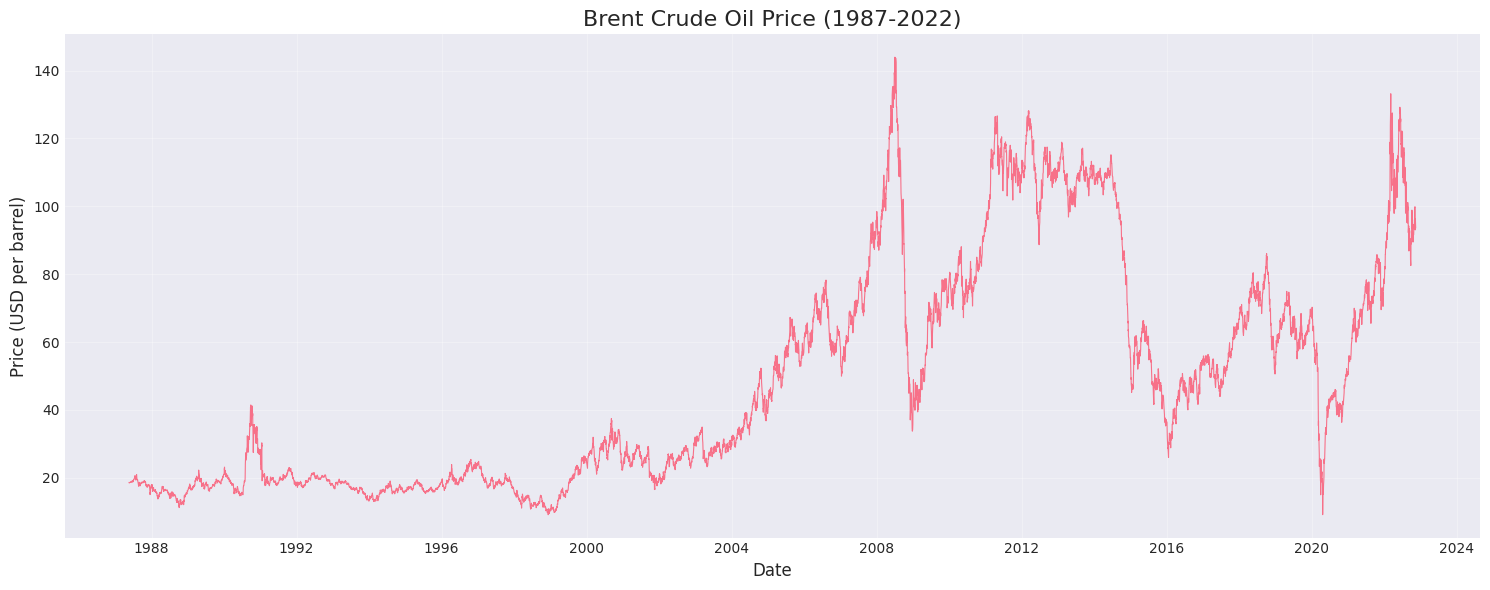

In [6]:
# Plot the full price series
plt.figure(figsize=(15, 6))
plt.plot(df_clean.index, df_clean['price'], linewidth=0.8)
plt.title('Brent Crude Oil Price (1987-2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Next Steps
1. Calculate log returns for stationarity
2. Perform time series decomposition
3. Test for stationarity (ADF test)
4. Analyze volatility patterns